In [1]:
import torch
import torch.nn as nn

import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt

print(torch.__version__)
print(torchvision.__version__)

2.0.0
0.15.0


## getting fashion mnist datasets

In [2]:
from torchvision import datasets

train_data = datasets.FashionMNIST(
    root='data',
    train=True,
    download=True,
    transform=torchvision.transforms.ToTensor(),
    target_transform=None
)

test_data = datasets.FashionMNIST(
    root='data',
    train=False,
    download=True,
    transform=ToTensor(),
    target_transform=None
)

In [3]:
type(train_data)

torchvision.datasets.mnist.FashionMNIST

In [4]:
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [5]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [6]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [7]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [8]:
image.shape

torch.Size([1, 28, 28])

(-0.5, 27.5, 27.5, -0.5)

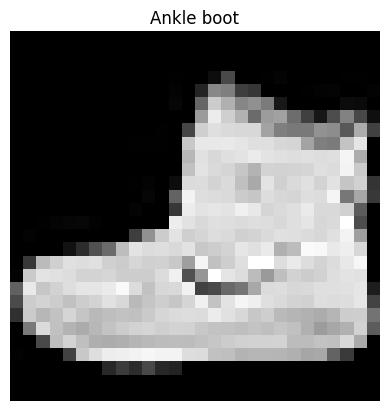

In [9]:
plt.imshow(image.squeeze(), cmap='gray')
plt.title(class_names[label])
plt.axis(False)

In [10]:
SEED = 42

In [11]:
def plt_show_img(img, label, no_axis=True):
    plt.imshow(img.squeeze(), cmap='gray')
    plt.title(f"{class_names[label]} : {label}")
    if no_axis:
        plt.axis(False)

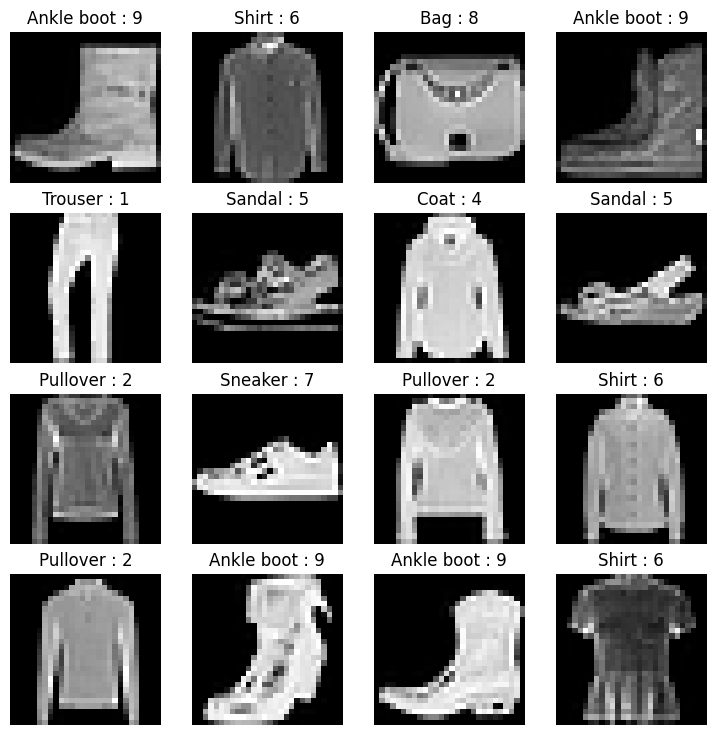

In [12]:
torch.manual_seed(SEED)
fig = plt.figure(figsize=(9, 9))
rows, cols = 4, 4
for plot_idx in range(1, rows * cols + 1):
    random_idx = torch.randint(0, len(train_data), size=(1,)).item()
    img, label = train_data[random_idx]
    fig.add_subplot(rows, cols, plot_idx)
    plt_show_img(img, label)

In [13]:
train_data, test_data

(Dataset FashionMNIST
     Number of datapoints: 60000
     Root location: data
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset FashionMNIST
     Number of datapoints: 10000
     Root location: data
     Split: Test
     StandardTransform
 Transform: ToTensor())

In [14]:
train_data

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [15]:
from torch.utils.data import DataLoader

In [16]:
BATCH_SIZE = 32

In [17]:
train_dataloader = DataLoader(
    dataset=train_data,
    batch_size=BATCH_SIZE,
    shuffle=True,
)

test_dataloader = DataLoader(
    dataset=test_data,
    batch_size=BATCH_SIZE,
    shuffle=True,
)

In [18]:
train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7f1c963010a0>,
 <torch.utils.data.dataloader.DataLoader at 0x7f1c96301100>)

In [19]:
train_features_batch, train_labels_batch = next(iter(train_dataloader))

In [20]:
len(train_dataloader)

1875

In [21]:
train_features_batch.shape

torch.Size([32, 1, 28, 28])

In [22]:
train_labels_batch.shape

torch.Size([32])

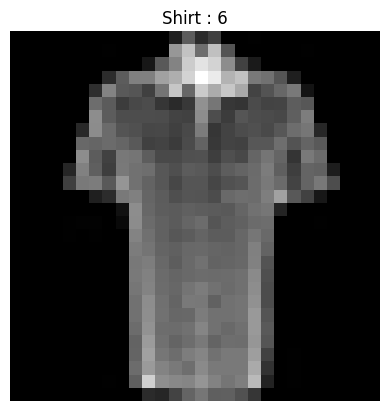

In [23]:
torch.manual_seed(SEED)
random_idx = torch.randint(0, len(train_features_batch), size=(1,)).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt_show_img(img, label)

In [24]:
from torch.nn.modules import flatten

flatten_model = nn.Flatten()

x = train_features_batch[0]

output = flatten_model(x)

print(f"shape before flatten {x.shape}")
print(f"shape after flatten {output.shape}")

shape before flatten torch.Size([1, 28, 28])
shape after flatten torch.Size([1, 784])


In [25]:
class FashionMNISTModelV0(nn.Module):
    def __init__(self,
                 input_shape: int,
                 hidden_units: int,
                 output_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape, out_features=hidden_units),
            nn.Linear(in_features=hidden_units, out_features=output_shape)
        )

    def forward(self, x):
        return self.layer_stack(x)

In [26]:
torch.manual_seed(42)

model_0 = FashionMNISTModelV0(
    input_shape=28 * 28,
    hidden_units=10,
    output_shape=len(class_names)
).to('cpu')

model_0

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [27]:
dummy_x = torch.rand((1, 1, 28, 28))
model_0(dummy_x)

tensor([[-0.0315,  0.3171,  0.0531, -0.2525,  0.5959,  0.2112,  0.3233,  0.2694,
         -0.1004,  0.0157]], grad_fn=<AddmmBackward0>)

In [28]:
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
    print("helper_functions.py already exists, skipping download")
else:
    print("Downloading helper_functions.py")
    # Note: you need the "raw" GitHub URL for this to work
    request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
    with open("helper_functions.py", "wb") as f:
        f.write(request.content)

helper_functions.py already exists, skipping download


In [29]:
# Import accuracy metric
from helper_functions import accuracy_fn

# Note: could also use torchmetrics.Accuracy(task = 'multiclass', num_classes=len(class_names)).to(device)

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()  # this is also called "criterion"/"cost function" in some places
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.1)

In [30]:
from timeit import default_timer as timer

In [31]:
def print_train_time(start: float, end: float, device: torch.device = None):
    total_time = start_time = end - start
    print(f"Train time on {device}: {total_time:.3f} seconds")
    return total_time

In [32]:
start_time = timer()

end_time = timer()

In [33]:
from tqdm.auto import tqdm

In [34]:
torch.manual_seed(SEED)
train_time_start_on_cpu = timer()

epochs = 3

for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n------")
    train_loss = 0
    for batch, (X, y) in enumerate(train_dataloader):
        model_0.train()
        y_pred = model_0(X)
        loss = loss_fn(y_pred, y)
        train_loss += loss
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 400 == 0:
            print(f"Looked at {batch * len(X)} / {len(train_dataloader.dataset)} samples.")

    train_loss /= len(train_dataloader)
    test_loss, test_acc = 0, 0
    model_0.eval()
    with torch.inference_mode():
        for X_test, y_test in test_dataloader:
            test_pred = model_0(X_test)
            test_loss += loss_fn(test_pred, y_test)
            test_acc += accuracy_fn(y_test, test_pred.argmax(dim=1))

        test_loss /= len(test_dataloader)

        test_acc /= len(test_dataloader)

    print(f"\nTrain loss: {train_loss:.4f} | Test loss: {test_loss:.4f}, Test acc: {test_acc:.2f}\n")

# Calculate training time      
train_time_end_on_cpu = timer()
total_train_time_model_0 = print_train_time(start=train_time_start_on_cpu,
                                            end=train_time_end_on_cpu,
                                            device=str(next(model_0.parameters()).device))



  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
------
Looked at 0 / 60000 samples.
Looked at 12800 / 60000 samples.
Looked at 25600 / 60000 samples.
Looked at 38400 / 60000 samples.
Looked at 51200 / 60000 samples.

Train loss: 0.5904 | Test loss: 0.5102, Test acc: 82.04

Epoch: 1
------
Looked at 0 / 60000 samples.
Looked at 12800 / 60000 samples.
Looked at 25600 / 60000 samples.
Looked at 38400 / 60000 samples.
Looked at 51200 / 60000 samples.

Train loss: 0.4743 | Test loss: 0.5268, Test acc: 81.68

Epoch: 2
------
Looked at 0 / 60000 samples.
Looked at 12800 / 60000 samples.
Looked at 25600 / 60000 samples.
Looked at 38400 / 60000 samples.
Looked at 51200 / 60000 samples.

Train loss: 0.4537 | Test loss: 0.5126, Test acc: 83.00

Train time on cpu: 65.473 seconds


In [35]:
next(model_0.parameters()).device

device(type='cpu')

In [36]:
torch.manual_seed(SEED)

In [37]:
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn,
               device):
    loss, acc = 0, 0
    model.eval()
    with torch.inference_mode():
        for X, y in tqdm(data_loader):
            X, y = X.to(device), y.to(device)
            y_pred = model(X)
            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(y, y_pred.argmax(dim=1))

        loss /= len(data_loader)
        acc /= len(data_loader)

        return {
            'model_name': model.__class__.__name__,
            'model_loss': loss.item(),
            'model_acc': acc
        }

In [38]:
model_0_results = eval_model(
    model=model_0,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn,
    device='cpu'
)
model_0_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.5125296711921692,
 'model_acc': 83.00718849840256}

In [39]:
# !nvidia-smi

In [40]:
import torch

device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [41]:
class FashionMNISTModelV1(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),  # flatten inputs into single vector
            nn.Linear(in_features=input_shape, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=output_shape),
            nn.ReLU()
        )

    def forward(self, x: torch.Tensor):
        return self.layer_stack(x)

In [42]:
torch.manual_seed(SEED)
model_1 = FashionMNISTModelV1(
    input_shape=28 * 28,
    hidden_units=10,
    output_shape=len(class_names)
).to(device)

In [43]:
model_1.state_dict()

OrderedDict([('layer_stack.1.weight',
              tensor([[ 0.0273,  0.0296, -0.0084,  ..., -0.0142,  0.0093,  0.0135],
                      [-0.0188, -0.0354,  0.0187,  ..., -0.0106, -0.0001,  0.0115],
                      [-0.0008,  0.0017,  0.0045,  ..., -0.0127, -0.0188,  0.0059],
                      ...,
                      [-0.0116,  0.0273, -0.0344,  ...,  0.0176,  0.0283, -0.0011],
                      [-0.0230,  0.0257,  0.0291,  ..., -0.0187, -0.0087,  0.0001],
                      [ 0.0176, -0.0147,  0.0053,  ..., -0.0336, -0.0221,  0.0205]],
                     device='cuda:0')),
             ('layer_stack.1.bias',
              tensor([-0.0093,  0.0283, -0.0033,  0.0255,  0.0017,  0.0037, -0.0302, -0.0123,
                       0.0018,  0.0163], device='cuda:0')),
             ('layer_stack.3.weight',
              tensor([[ 0.0614, -0.0687,  0.0021,  0.2718,  0.2109,  0.1079, -0.2279, -0.1063,
                        0.2019,  0.2847],
                      [-0

In [44]:
from helper_functions import accuracy_fn

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.1)

In [45]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):
    train_loss, train_acc = 0, 0
    model.to(device)
    for batch, (X, y) in enumerate(data_loader):
        # Send data to GPU
        X, y = X.to(device), y.to(device)

        # 1. Forward pass
        y_pred = model(X)

        # 2. Calculate loss
        loss = loss_fn(y_pred, y)
        train_loss += loss
        train_acc += accuracy_fn(y_true=y,
                                 y_pred=y_pred.argmax(dim=1))  # Go from logits -> pred labels

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

    # Calculate loss and accuracy per epoch and print out what's happening
    train_loss /= len(data_loader)
    train_acc /= len(data_loader)
    print(f"Train loss: {train_loss:.5f} | Train accuracy: {train_acc:.2f}%")


def test_step(data_loader: torch.utils.data.DataLoader,
              model: torch.nn.Module,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device = device):
    test_loss, test_acc = 0, 0
    model.to(device)
    model.eval()  # put model in eval mode
    # Turn on inference context manager
    with torch.inference_mode():
        for X, y in data_loader:
            # Send data to GPU
            X, y = X.to(device), y.to(device)

            # 1. Forward pass
            test_pred = model(X)

            # 2. Calculate loss and accuracy
            test_loss += loss_fn(test_pred, y)
            test_acc += accuracy_fn(y_true=y,
                                    y_pred=test_pred.argmax(dim=1)  # Go from logits -> pred labels
                                    )

        # Adjust metrics and print out
        test_loss /= len(data_loader)
        test_acc /= len(data_loader)
        print(f"Test loss: {test_loss:.5f} | Test accuracy: {test_acc:.2f}%\n")

In [46]:
torch.manual_seed(42)

# Measure time
from timeit import default_timer as timer

train_time_start_on_gpu = timer()

epochs = 3
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n---------")
    train_step(data_loader=train_dataloader,
               model=model_1,
               loss_fn=loss_fn,
               optimizer=optimizer,
               accuracy_fn=accuracy_fn
               )
    test_step(data_loader=test_dataloader,
              model=model_1,
              loss_fn=loss_fn,
              accuracy_fn=accuracy_fn
              )

train_time_end_on_gpu = timer()
total_train_time_model_1 = print_train_time(start=train_time_start_on_gpu,
                                            end=train_time_end_on_gpu,
                                            device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
---------
Train loss: 1.09199 | Train accuracy: 61.34%
Test loss: 0.95690 | Test accuracy: 64.98%

Epoch: 1
---------
Train loss: 0.73779 | Train accuracy: 73.69%
Test loss: 0.72388 | Test accuracy: 74.21%

Epoch: 2
---------
Train loss: 0.66776 | Train accuracy: 76.08%
Test loss: 0.68751 | Test accuracy: 75.64%

Train time on cuda: 33.688 seconds


In [47]:
device

'cuda'

In [48]:
torch.manual_seed(SEED)

# Note: This will error due to `eval_model()` not using device agnostic code 
model_1_results = eval_model(model=model_1,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn,
                             device=device)
model_1_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.6881523728370667,
 'model_acc': 75.61900958466454}

In [49]:
class FashionMNISTModelV2(nn.Module):
    """
    replicates the TinyVGG
    """

    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(
                in_channels=input_shape,
                out_channels=hidden_units,
                kernel_size=(3, 3),
                stride=(1,),
                padding=1
            ),
            nn.ReLU(),
            nn.Conv2d(
                in_channels=hidden_units,
                out_channels=hidden_units,
                kernel_size=(3, 3),
                stride=(1,),
                padding=1
            ),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=(2, 2))
        )

        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(
                in_channels=hidden_units,
                out_channels=hidden_units,
                kernel_size=(3, 3),
                stride=(1,),
                padding=1,
            ),
            nn.ReLU(),
            nn.Conv2d(
                in_channels=hidden_units,
                out_channels=hidden_units,
                kernel_size=(3, 3),
                stride=(1,),
                padding=1
            ),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=(2, 2))

        )

        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(
                in_features=hidden_units * 7 * 7,
                out_features=output_shape
            )
        )

    def forward(self, x):
        x = self.conv_block_1(x)
        # print(x.shape)
        x = self.conv_block_2(x)
        # print(x.shape)
        x = self.classifier(x)
        return x


In [50]:
torch.manual_seed(SEED)

model_2 = FashionMNISTModelV2(
    input_shape=1,
    hidden_units=30,
    output_shape=len(class_names)
).to(device)

model_2

FashionMNISTModelV2(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 30, kernel_size=(3, 3), stride=(1,), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(30, 30, kernel_size=(3, 3), stride=(1,), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(30, 30, kernel_size=(3, 3), stride=(1,), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(30, 30, kernel_size=(3, 3), stride=(1,), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=1470, out_features=10, bias=True)
  )
)

In [51]:
torch.manual_seed(SEED)

images = torch.randn(size=(32, 3, 64, 64))
test_image = images[0]

print(f"Image batch shape: {images.shape}")
print(f"Single image shape: {test_image.shape}")
print(f"Test image:\n {test_image}")

Image batch shape: torch.Size([32, 3, 64, 64])
Single image shape: torch.Size([3, 64, 64])
Test image:
 tensor([[[ 1.9269,  1.4873,  0.9007,  ...,  1.8446, -1.1845,  1.3835],
         [ 1.4451,  0.8564,  2.2181,  ...,  0.3399,  0.7200,  0.4114],
         [ 1.9312,  1.0119, -1.4364,  ..., -0.5558,  0.7043,  0.7099],
         ...,
         [-0.5610, -0.4830,  0.4770,  ..., -0.2713, -0.9537, -0.6737],
         [ 0.3076, -0.1277,  0.0366,  ..., -2.0060,  0.2824, -0.8111],
         [-1.5486,  0.0485, -0.7712,  ..., -0.1403,  0.9416, -0.0118]],

        [[-0.5197,  1.8524,  1.8365,  ...,  0.8935, -1.5114, -0.8515],
         [ 2.0818,  1.0677, -1.4277,  ...,  1.6612, -2.6223, -0.4319],
         [-0.1010, -0.4388, -1.9775,  ...,  0.2106,  0.2536, -0.7318],
         ...,
         [ 0.2779,  0.7342, -0.3736,  ..., -0.4601,  0.1815,  0.1850],
         [ 0.7205, -0.2833,  0.0937,  ..., -0.1002, -2.3609,  2.2465],
         [-1.3242, -0.1973,  0.2920,  ...,  0.5409,  0.6940,  1.8563]],

        [[-0

In [52]:
conv_layer = nn.Conv2d(
    in_channels=3,
    out_channels=10,
    kernel_size=(3, 3),
    stride=(1,),
    padding=0
)
# how can i print the expected shape of the layer?

conv_output = conv_layer(test_image)
# print(conv_output)
print(conv_output.shape)

# conv_output = conv_layer(test_image.unsqueeze(dim=0))
# conv_output
# print(conv_output.shape)

torch.Size([10, 62, 62])


In [53]:
test_image.shape

torch.Size([3, 64, 64])

In [54]:
max_pool_layer = nn.MaxPool2d(kernel_size=(2,))
test_image_through_conv = conv_layer(test_image.unsqueeze(dim=0))
print(f"shape after going through conv_layer(): {test_image_through_conv.shape}")

test_image_through_conv_and_max_pool = max_pool_layer(test_image_through_conv)
print(f"shape after going through conv_layer() and max_pool_layer: {test_image_through_conv_and_max_pool.shape}")

shape after going through conv_layer(): torch.Size([1, 10, 62, 62])
shape after going through conv_layer() and max_pool_layer: torch.Size([1, 10, 31, 31])


In [55]:
torch.manual_seed(SEED)

random_tensor = torch.rand(size=(1, 1, 2, 2))
random_tensor

max_pool_layer = nn.MaxPool2d(kernel_size=2)

max_pool_tensor = max_pool_layer(random_tensor)
print(f"Max pool tensor: \n{max_pool_tensor}")
print(f"Max pool tensor shape: {max_pool_tensor.shape}")

Max pool tensor: 
tensor([[[[0.9593]]]])
Max pool tensor shape: torch.Size([1, 1, 1, 1])


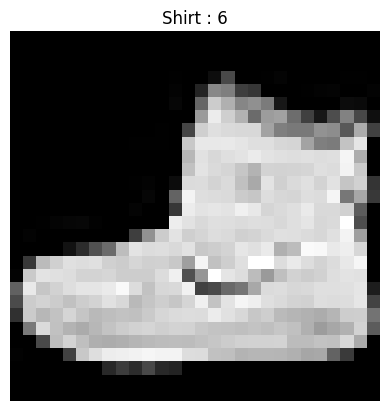

In [56]:
plt_show_img(image, label)

In [57]:
model_2(image.unsqueeze(0).to(device))

tensor([[ 0.0107,  0.0246, -0.0167, -0.0073,  0.0277, -0.0371, -0.0003, -0.0183,
          0.0224, -0.0245]], device='cuda:0', grad_fn=<AddmmBackward0>)

In [58]:
rand_image_tensor = torch.randn(size=(1, 28, 28)).to(device)
rand_image_tensor.shape

torch.Size([1, 28, 28])

In [59]:
model_2(rand_image_tensor.unsqueeze(0))

tensor([[ 0.0354,  0.0324, -0.0417, -0.0211,  0.0339, -0.0301,  0.0021, -0.0141,
          0.0033, -0.0180]], device='cuda:0', grad_fn=<AddmmBackward0>)

In [60]:
from helper_functions import accuracy_fn

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_2.parameters(), lr=0.1)

In [61]:
epochs = 3
train_st_timer = timer()
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n------")
    train_step(
        model=model_2,
        data_loader=train_dataloader,
        loss_fn=loss_fn,
        optimizer=optimizer,
        accuracy_fn=accuracy_fn,
        device=device
    )

    test_step(
        model=model_2,
        data_loader=test_dataloader,
        loss_fn=loss_fn,
        accuracy_fn=accuracy_fn,
        device=device
    )

train_ed_timer = timer()
total_train_time_model_2 = print_train_time(
    start=train_st_timer,
    end=train_ed_timer,
    device=device
)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
------
Train loss: 0.57468 | Train accuracy: 79.33%
Test loss: 0.36463 | Test accuracy: 86.58%

Epoch: 1
------
Train loss: 0.33117 | Train accuracy: 88.19%
Test loss: 0.35166 | Test accuracy: 87.07%

Epoch: 2
------
Train loss: 0.29375 | Train accuracy: 89.44%
Test loss: 0.29308 | Test accuracy: 89.47%

Train time on cuda: 37.106 seconds


In [62]:
model_2_results = eval_model(
    model=model_2,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn,
    device=device
)

model_2_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.2929387390613556,
 'model_acc': 89.48682108626198}

## Compare Results

In [63]:
import pandas as pd

In [64]:
compare_results = pd.DataFrame(
    [
        model_0_results,
        model_1_results,
        model_2_results,
    ]
)

compare_results

,model_name,model_loss,model_acc
0,FashionMNISTModelV0,0.512530,83.007188
1,FashionMNISTModelV1,0.688152,75.619010
2,FashionMNISTModelV2,0.292939,89.486821


In [65]:
compare_results['training_time'] = [
    total_train_time_model_0,
    total_train_time_model_1,
    total_train_time_model_2,
]
compare_results

,model_name,model_loss,model_acc,training_time
0,FashionMNISTModelV0,0.512530,83.007188,65.473214
1,FashionMNISTModelV1,0.688152,75.619010,33.687611
2,FashionMNISTModelV2,0.292939,89.486821,37.105956


## Visualize model results

Text(0, 0.5, 'model')

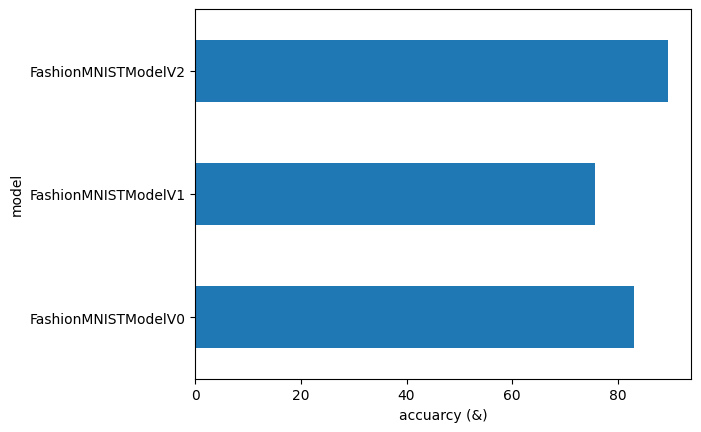

In [66]:
compare_results.set_index('model_name')['model_acc'].plot(kind='barh')
plt.xlabel('accuarcy (&)')
plt.ylabel('model')

## Make and evaluate random prediction with best model

In [87]:
def make_predictions(model: torch.nn.Module, data: list, device: torch.device = device):
    pred_probs = []
    model.eval()
    with torch.inference_mode():
        for sample in data:
            sample = torch.unsqueeze(sample, dim=0).to(device)
            pred_logit = model(sample)
            pred_prob = torch.softmax(pred_logit.squeeze(), dim=0)
            pred_probs.append(pred_prob.cpu())

    return torch.stack(pred_probs)

In [88]:
import random
# random.seed(42)

test_samples = []
test_labels = []
for sample, label in random.sample(list(test_data), k=9):
    test_samples.append(sample)
    test_labels.append(label)

test_samples[0].shape

torch.Size([1, 28, 28])

Text(0.5, 1.0, 'Pullover')

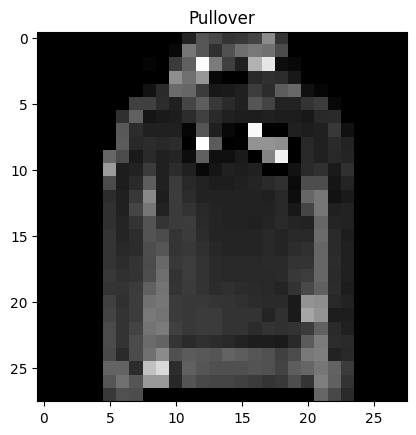

In [89]:
plt.imshow(test_samples[0].squeeze(), cmap='gray')
plt.title(class_names[test_labels[0]])

In [90]:
pred_probs = make_predictions(model=model_2, data=test_samples)
pred_classes = pred_probs.argmax(dim=1)

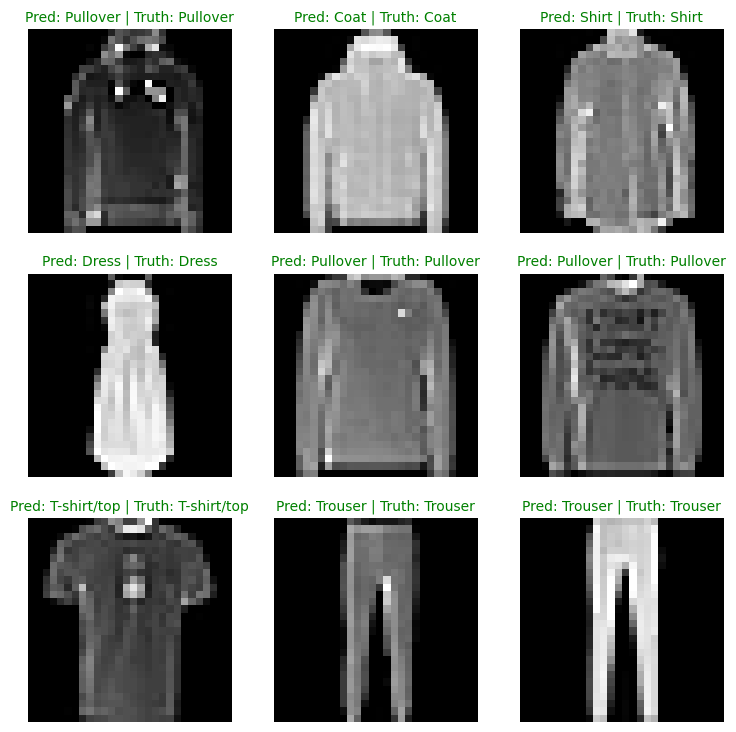

In [91]:
plt.figure(figsize=(9,9))
n_rows = 3
n_cols = 3
for i, sample in enumerate(test_samples):
    plt.subplot(n_rows, n_cols, i + 1)
    plt.imshow(sample.squeeze(), cmap='gray')
    pred_label = class_names[pred_classes[i]]
    truth_label = class_names[test_labels[i]]
    title_text = f"Pred: {pred_label} | Truth: {truth_label}"

    if pred_label == truth_label:
        plt.title(title_text, fontsize=10, c='g')
    else:
        plt.title(title_text, fontsize=10, c='r')

    plt.axis(False)


In [100]:
from tqdm.auto import tqdm

y_preds = []
model_2.eval()
with torch.inference_mode():
    for X, y in tqdm(test_dataloader, desc='Making predictions ...'):
        X, y = X.to(device), y.to(device)
        y_logit = model_2(X)
        y_pred = y_logit.squeeze().softmax(dim=0).argmax(dim=1)
        y_preds.append(y_pred.cpu())

Making predictions:   0%|          | 0/313 [00:00<?, ?it/s]

In [107]:
# Import tqdm for progress bar
from tqdm.auto import tqdm

# 1. Make predictions with trained model
y_preds = []
model_2.eval()
with torch.inference_mode():
  for X, y in tqdm(test_dataloader, desc="Making predictions"):
    # Send data and targets to target device
    X, y = X.to(device), y.to(device)
    # Do the forward pass
    y_logit = model_2(X)
    # Turn predictions from logits -> prediction probabilities -> predictions labels
    y_pred = torch.softmax(y_logit, dim=1).argmax(dim=1)
    # Put predictions on CPU for evaluation
    y_preds.append(y_pred.cpu())
# Concatenate list of predictions into a tensor
y_pred_tensor = torch.cat(y_preds)

Making predictions:   0%|          | 0/313 [00:00<?, ?it/s]

In [103]:
y_preds[:10]

[tensor([1, 2, 3, 2, 7, 5, 9, 0, 5, 1, 6, 1, 5, 1, 0, 2, 5, 5, 8, 7, 9, 9, 7, 3,
         0, 5, 4, 8, 3, 9, 7, 0]),
 tensor([1, 9, 0, 1, 9, 1, 5, 2, 7, 1, 3, 7, 1, 1, 0, 1, 6, 3, 4, 1, 1, 8, 8, 0,
         4, 6, 1, 6, 4, 2, 6, 3]),
 tensor([3, 5, 6, 8, 5, 5, 3, 2, 0, 7, 7, 9, 8, 9, 9, 0, 2, 5, 4, 4, 8, 4, 6, 4,
         0, 9, 4, 7, 7, 0, 0, 5]),
 tensor([0, 3, 4, 5, 2, 0, 4, 9, 4, 8, 3, 5, 2, 7, 0, 8, 8, 3, 6, 6, 4, 1, 1, 1,
         4, 9, 5, 9, 8, 3, 3, 1]),
 tensor([4, 0, 6, 0, 8, 7, 8, 2, 0, 1, 7, 0, 2, 0, 1, 6, 1, 9, 9, 7, 8, 6, 4, 9,
         7, 2, 2, 2, 3, 2, 6, 1]),
 tensor([8, 6, 0, 2, 6, 7, 0, 6, 7, 0, 6, 3, 2, 8, 4, 7, 7, 9, 4, 2, 8, 5, 4, 9,
         2, 9, 8, 8, 6, 0, 1, 4]),
 tensor([7, 1, 1, 0, 0, 4, 2, 5, 8, 6, 1, 1, 1, 7, 8, 0, 5, 1, 5, 8, 0, 3, 0, 8,
         9, 8, 3, 6, 6, 8, 8, 8]),
 tensor([1, 6, 9, 1, 3, 5, 4, 1, 9, 2, 6, 9, 5, 8, 4, 2, 2, 0, 1, 6, 3, 4, 8, 4,
         3, 6, 2, 1, 7, 8, 7, 7]),
 tensor([5, 7, 8, 9, 4, 8, 7, 5, 0, 4, 3, 1, 9, 0, 8, 1, 8, 9, 1, 8, 0, 

In [104]:
y_pred_tensor = torch.cat(y_preds)
y_pred_tensor[:10]

tensor([1, 2, 3, 2, 7, 5, 9, 0, 5, 1])

In [105]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

In [108]:
accuracy_fn(y_pred_tensor, test_data.targets)

9.68

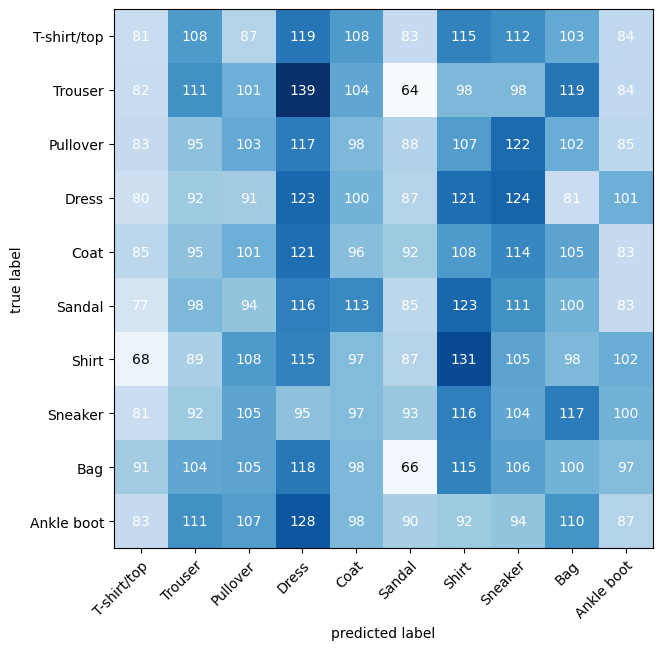

In [98]:
confmat = ConfusionMatrix(task='multiclass', num_classes=len(class_names))
confmat_tensor = confmat(preds=y_pred_tensor, target=test_data.targets)

fig, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(),
    class_names=class_names,
    figsize=(11, 7)
)

In [97]:
confmat_tensor

tensor([[ 81, 108,  87, 119, 108,  83, 115, 112, 103,  84],
        [ 82, 111, 101, 139, 104,  64,  98,  98, 119,  84],
        [ 83,  95, 103, 117,  98,  88, 107, 122, 102,  85],
        [ 80,  92,  91, 123, 100,  87, 121, 124,  81, 101],
        [ 85,  95, 101, 121,  96,  92, 108, 114, 105,  83],
        [ 77,  98,  94, 116, 113,  85, 123, 111, 100,  83],
        [ 68,  89, 108, 115,  97,  87, 131, 105,  98, 102],
        [ 81,  92, 105,  95,  97,  93, 116, 104, 117, 100],
        [ 91, 104, 105, 118,  98,  66, 115, 106, 100,  97],
        [ 83, 111, 107, 128,  98,  90,  92,  94, 110,  87]])